In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.set_printoptions(precision=8)

### $\beta$-scaling (but the original estimator)

In [4]:
data = np.loadtxt("3_9_2_2D_42.576569_2.000000_1.000000_100000000_17_can_SWAP.dat")
np.shape(data)
data[:4]
data.shape[0]

243

In [5]:
P = np.sum(data,axis=0)
P

array([249026., 244084., 241473., 240005., 240412.])

In [6]:
pj = np.zeros(data.shape)

In [7]:
for i in range(data.shape[1]):
    pj[:,i]=P[i]

In [8]:
N_rows = data.shape[0]
pj_bar = (pj-data)/(N_rows-1)

In [9]:
D = 2
l_A = 1
m_A = l_A**D
S = -np.log(pj_bar[:,m_A]/pj_bar[:,0])

In [10]:
S_mean = np.mean(S)
S_mean

0.020044876373571156

In [11]:
S_err = np.sqrt(N_rows-1)*np.std(S)
S_err

0.003266853247075429

In [12]:
S_exact=1.573862357119216

In [13]:
Us = np.geomspace(0.03,100.0,20)

In [14]:
idx=19
print(f'{Us[idx]:0.6f}')

100.000000


In [15]:
print("%.6f %.6f"%(S_mean,S_err))

0.020045 0.003267


In [16]:
sweep_data = np.loadtxt("preliminaryUSweep_l1x1.dat")
S2_sweep = sweep_data[:,1]
errors_sweep = sweep_data[:,2]

In [17]:
sweep_data2 = np.loadtxt("preliminaryUSweep_l2x2.dat")
S2_sweep2 = sweep_data2[:,1]
errors_sweep2 = sweep_data2[:,2]

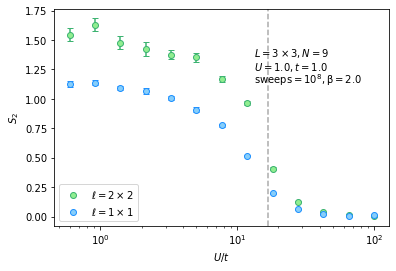

In [33]:
plt.plot(Us[7:],S2_sweep2[7:],'o',mec='mediumseagreen',mfc='lightgreen',label=r'$\ell=2\times2$')
plt.errorbar(Us[7:], S2_sweep2[7:], yerr=errors_sweep2[7:], fmt='.', capsize=3,zorder=-1,color='mediumseagreen');
plt.plot(Us[7:],S2_sweep[7:],'o',mec='dodgerblue',mfc='lightskyblue',label=r'$\ell=1\times1$')
plt.errorbar(Us[7:], S2_sweep[7:], yerr=errors_sweep[7:], fmt='.', capsize=3,zorder=-1,color='dodgerblue');
plt.xlabel(r"$U/t$")
plt.ylabel(r"$S_2$")
plt.xscale("log")
plt.annotate(r'$L=3\times3,N=9$',(0.64,0.79),xycoords='figure fraction')
plt.annotate(r'$U=1.0,t=1.0$',(0.64,0.74),xycoords='figure fraction')
plt.annotate(r'$\rm{sweeps}=10^8,\beta=2.0$',(0.64,0.69),xycoords='figure fraction')
plt.legend(loc='lower left')
plt.axvline(1/0.06,ls='--',zorder=-1,color="#aaaaaa")
plt.savefig('preliminaryGreiner.pdf')